In [1]:
import h5py
import numpy as np
import pandas as pd 

import fastdtw
from dtaidistance import dtw
import scipy.spatial.distance as sd

from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1550)

In [20]:
difference_masked = pd.read_csv("/home/pravn/Documents/difference_ew_sobject_id.csv")

In [35]:
difference_masked_halpa = difference_masked[difference_masked["EW"]>0.25]

In [36]:
difference_masked_halpa["sobject_id"].count()

10631

In [37]:
df_new_emiss_25 = difference_masked_halpa[difference_masked_halpa["EW"]<5.5]

In [6]:
hf_grid = h5py.File("/home/pravn/Dropbox/Masters/Research Data/wl_grid.h5", "r")
wl_grid = np.array(hf_grid["wl_grid"])
hf_grid.close()

In [38]:
df_new_emiss_25_data_only = df_new_emiss_25.drop(columns=['EW','sobject_id'])
df_new_emiss_25_data_only = 1 - df_new_emiss_25_data_only

In [39]:
df_new_emiss_25_data_only_np = df_new_emiss_25_data_only.to_numpy()

In [40]:
from dtaidistance import dtw
ds = dtw.distance_matrix_fast(df_new_emiss_25_data_only_np)

In [41]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Blues') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

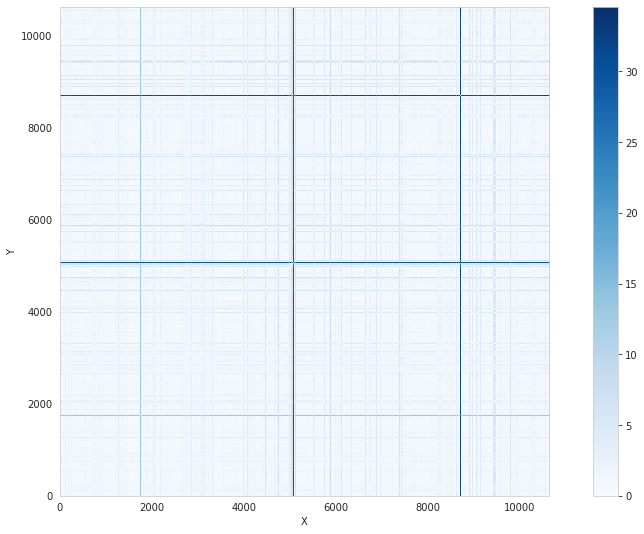

In [42]:
distance_cost_plot(ds)

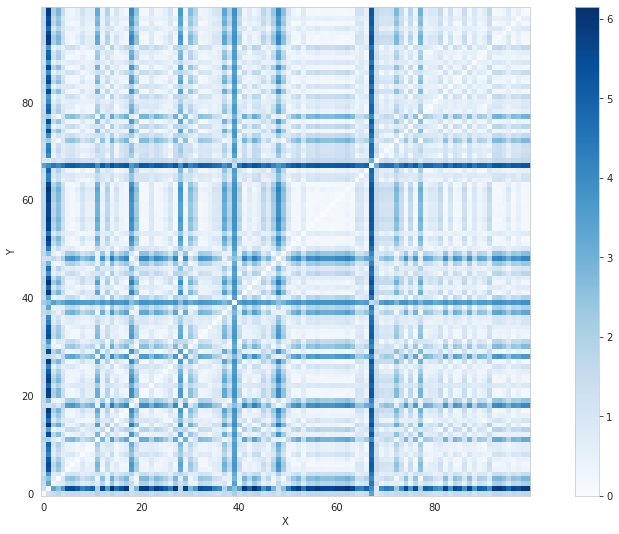

In [43]:
distance_cost_plot(ds[0:100:,0:100])

In [44]:
agglom = AgglomerativeClustering(n_clusters = 10, linkage = 'complete', affinity='precomputed')
agglom.fit(ds)
agglom.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [46]:
score = silhouette_score(df_new_emiss_25_data_only_np , agglom.labels_)
print(score)

0.7414685430620136


In [47]:
old_names = df_new_emiss_25_data_only.columns.tolist()
new_names = wl_grid[PLOT_MASK].tolist()
col_rename_dict = {i:j for i,j in zip(old_names, new_names)}
df_new_emiss_25_data_only.rename(columns=col_rename_dict, inplace=True)
df_new_emiss_25_data_only

,6561.00,6561.06,6561.12,6561.18,6561.24,6561.30,6561.36,6561.42,6561.48,6561.54,...,6564.90,6564.96,6565.02,6565.08,6565.14,6565.20,6565.26,6565.32,6565.38,6565.44
184,0.075960,0.009056,-0.035872,0.000082,-0.007090,0.040568,0.064033,0.004468,-0.053028,-0.020851,...,0.015313,-0.057515,-0.058777,0.008200,0.014349,-0.013882,-0.005337,0.006632,-0.062115,-0.032505
344,-0.015197,-0.033224,-0.034230,-0.021351,-0.039321,-0.021485,-0.014050,-0.013468,-0.021244,-0.027063,...,0.026412,0.047041,0.000352,-0.019898,-0.008814,-0.001019,-0.003493,0.007281,0.018341,0.006181
354,0.093967,0.105784,0.098533,0.101957,0.106478,0.101421,0.089666,0.076592,0.059162,0.051849,...,0.093570,0.093174,0.077719,0.076650,0.089367,0.079384,0.082447,0.068070,0.069008,0.056719
415,0.001771,0.011163,0.012543,-0.000953,-0.009189,0.002892,0.018658,0.017910,0.014647,0.012131,...,0.008928,0.008229,0.008512,0.004796,0.013446,0.022129,0.021338,0.019004,0.010385,0.003707
463,0.037719,0.054547,0.098240,0.113025,0.073713,0.031516,0.025153,0.049004,0.088017,0.111416,...,0.052085,0.031096,0.031868,-0.001330,-0.027174,-0.001780,0.042767,0.056241,0.029693,0.005661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588273,0.120806,0.107303,0.088593,0.093607,0.089854,0.087214,0.107169,0.124504,0.108718,0.106315,...,0.053293,0.048991,0.024328,0.000448,-0.003636,0.009843,0.017444,0.013444,-0.002322,-0.006801
588302,0.045812,0.033281,0.042087,0.049917,0.042595,0.036013,0.038136,0.043389,0.049691,0.057195,...,0.111408,0.090541,0.082693,0.068879,0.043638,0.027078,0.029882,0.040265,0.047984,0.038318
588320,0.020054,0.032046,0.036305,0.036057,0.040108,0.032772,0.037513,0.044232,0.048204,0.059839,...,0.045499,0.055322,0.060110,0.047217,0.035791,0.031472,0.019479,0.031355,0.027473,0.022524
588321,0.014589,0.023716,0.027431,0.020539,0.010978,0.006797,0.013031,0.030670,0.031106,0.024339,...,0.010417,0.006112,0.001064,0.007966,0.004360,-0.005651,-0.004316,0.005690,0.023460,0.027030


In [48]:
df_new_emiss_25_data_only["label"] = pd.Series(agglom.labels_, index = df_new_emiss_25_data_only.index)
df_new_emiss_25_data_only

,6561.00000000059,6561.060000000591,6561.120000000591,6561.1800000005915,6561.240000000592,6561.300000000592,6561.360000000593,6561.420000000593,6561.4800000005935,6561.540000000594,...,6564.960000000617,6565.020000000617,6565.0800000006175,6565.140000000618,6565.200000000618,6565.260000000619,6565.320000000619,6565.3800000006195,6565.44000000062,label
184,0.075960,0.009056,-0.035872,0.000082,-0.007090,0.040568,0.064033,0.004468,-0.053028,-0.020851,...,-0.057515,-0.058777,0.008200,0.014349,-0.013882,-0.005337,0.006632,-0.062115,-0.032505,0
344,-0.015197,-0.033224,-0.034230,-0.021351,-0.039321,-0.021485,-0.014050,-0.013468,-0.021244,-0.027063,...,0.047041,0.000352,-0.019898,-0.008814,-0.001019,-0.003493,0.007281,0.018341,0.006181,0
354,0.093967,0.105784,0.098533,0.101957,0.106478,0.101421,0.089666,0.076592,0.059162,0.051849,...,0.093174,0.077719,0.076650,0.089367,0.079384,0.082447,0.068070,0.069008,0.056719,0
415,0.001771,0.011163,0.012543,-0.000953,-0.009189,0.002892,0.018658,0.017910,0.014647,0.012131,...,0.008229,0.008512,0.004796,0.013446,0.022129,0.021338,0.019004,0.010385,0.003707,0
463,0.037719,0.054547,0.098240,0.113025,0.073713,0.031516,0.025153,0.049004,0.088017,0.111416,...,0.031096,0.031868,-0.001330,-0.027174,-0.001780,0.042767,0.056241,0.029693,0.005661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588273,0.120806,0.107303,0.088593,0.093607,0.089854,0.087214,0.107169,0.124504,0.108718,0.106315,...,0.048991,0.024328,0.000448,-0.003636,0.009843,0.017444,0.013444,-0.002322,-0.006801,0
588302,0.045812,0.033281,0.042087,0.049917,0.042595,0.036013,0.038136,0.043389,0.049691,0.057195,...,0.090541,0.082693,0.068879,0.043638,0.027078,0.029882,0.040265,0.047984,0.038318,0
588320,0.020054,0.032046,0.036305,0.036057,0.040108,0.032772,0.037513,0.044232,0.048204,0.059839,...,0.055322,0.060110,0.047217,0.035791,0.031472,0.019479,0.031355,0.027473,0.022524,0
588321,0.014589,0.023716,0.027431,0.020539,0.010978,0.006797,0.013031,0.030670,0.031106,0.024339,...,0.006112,0.001064,0.007966,0.004360,-0.005651,-0.004316,0.005690,0.023460,0.027030,0


In [49]:
df_new_emiss_25_data_only["label"].value_counts()

0    10495
4       81
5       19
3       11
6        7
1        4
7        3
2        3
9        1
8        1
Name: label, dtype: int64

Int64Index([ 41660,  86811,  99013, 175266, 211807, 264502, 273248, 286288,
            480086, 485106, 485863],
           dtype='int64')


Text(6562.78, 2.5, 'Hα')

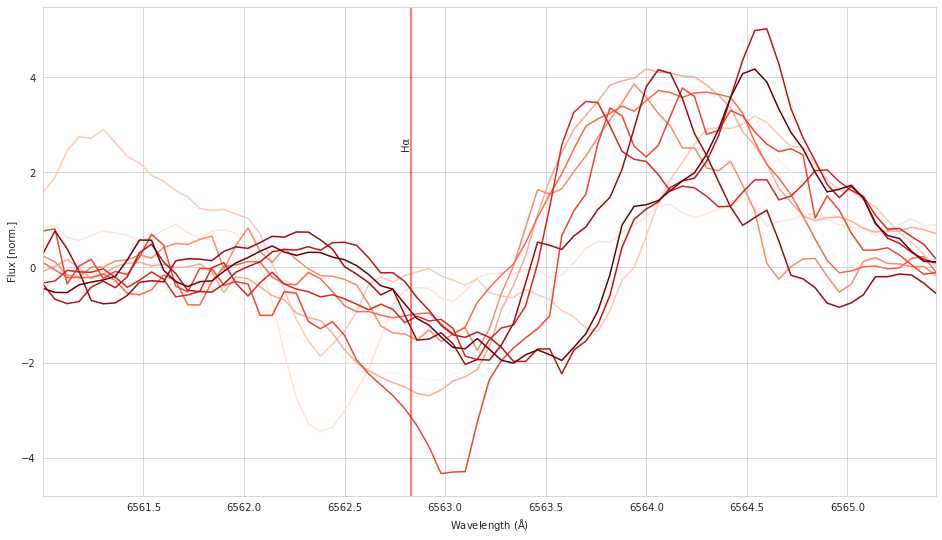

In [54]:
CLASS = 3
df_masked_label = df_new_emiss_25_data_only.loc[df_new_emiss_25_data_only["label"]==CLASS]
print(df_masked_label.index)
ax = (df_new_emiss_25_data_only.loc[df_new_emiss_25_data_only['label'] == CLASS].drop(columns=['label']).T).plot(
    legend=False, 
    xlabel = "Wavelength ($\mathrm{\AA}$)", 
    ylabel = "Flux [norm.]",
    #xticks = wl_grid[PLOT_MASK],
    xlim = (wl_grid[PLOT_MASK].min(),wl_grid[PLOT_MASK].max()),
    colormap = "Reds"
    )
halpha_line = ax.axvline(x=6562.83, color='red', label="coral", alpha=0.7)
ax.text(6562.78,2.5,"Hα", rotation=90)

In [55]:
from dtaidistance import clustering

In [56]:
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})

In [57]:
cluster_idx = model1.fit(df_new_emiss_25_data_only_np)

In [58]:
cluster_idx

{0: {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
 

In [60]:
model = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=10)
cluster_idx = model.fit(df_new_emiss_25_data_only_np)
model.plot("kmedoids.png")

(None, None)